2022-03-16 10:11:45,414 - pynamics.system - INFO - getting dynamic equations
2022-03-16 10:11:47,021 - pynamics.system - INFO - solving a = f/m and creating function
2022-03-16 10:11:55,610 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-03-16 10:12:08,643 - pynamics.system - INFO - done solving a = f/m and creating function
2022-03-16 10:12:08,651 - pynamics.integration - INFO - beginning integration
2022-03-16 10:12:08,652 - pynamics.system - INFO - integration at time 0000.00
2022-03-16 10:12:15,521 - pynamics.system - INFO - integration at time 0006.00
2022-03-16 10:12:18,694 - pynamics.integration - INFO - finished integration
2022-03-16 10:12:18,709 - pynamics.output - INFO - calculating outputs
2022-03-16 10:12:18,734 - pynamics.output - INFO - done calculating outputs
2022-03-16 10:12:18,829 - pynamics.output - INFO - calculating outputs
2022-03-16 10:12:18,844 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

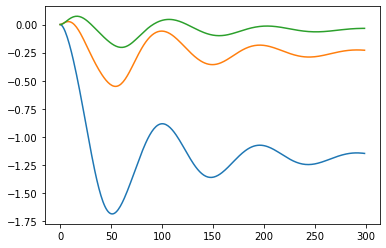

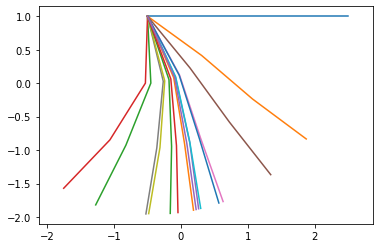

In [1]:
# -*- coding: utf-8 -*-
"""
Written by Daniel M. Aukes
Email: danaukes<at>gmail.com
Please see LICENSE for full license.
"""

import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
from pynamics.constraint import AccelerationConstraint,KinematicConstraint
import pynamics.integration
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
import sympy
sympy.init_printing(pretty_print=False)
import math

system = System()
pynamics.set_system(__name__,system)

constrain_base=True
simplify_w = False

lA = Constant(1,'lA',system)
lB = Constant(1,'lB',system)
lC = Constant(1,'lC',system)

mA = Constant(1,'mA',system)
mB = Constant(1,'mB',system)
mC = Constant(1,'mC',system)

g = Constant(9.81,'g',system)
b = Constant(1e1,'b',system)
k = Constant(1e1,'k',system)

preload1 = Constant(0*pi/180,'preload1',system)
preload2 = Constant(0*pi/180,'preload2',system)
preload3 = Constant(0*pi/180,'preload3',system)

Ixx_A = Constant(1,'Ixx_A',system)
Iyy_A = Constant(1,'Iyy_A',system)
Izz_A = Constant(1,'Izz_A',system)
Ixx_B = Constant(1,'Ixx_B',system)
Iyy_B = Constant(1,'Iyy_B',system)
Izz_B = Constant(1,'Izz_B',system)
Ixx_C = Constant(1,'Ixx_C',system)
Iyy_C = Constant(1,'Iyy_C',system)
Izz_C = Constant(1,'Izz_C',system)

torque = Constant(0,'torque',system)
freq = Constant(3e0,'freq',system)

x,x_d,x_dd = Differentiable('x',system)
y,y_d,y_dd = Differentiable('y',system)
z,z_d,z_dd = Differentiable('z',system)

x2,x2_d,x2_dd = Differentiable('x2',system)
y2,y2_d,y2_dd = Differentiable('y2',system)
z2,z2_d,z2_dd = Differentiable('z2',system)

x3,x3_d,x3_dd = Differentiable('x3',system)
y3,y3_d,y3_dd = Differentiable('y3',system)
z3,z3_d,z3_dd = Differentiable('z3',system)

qA1,qA1_d,qA1_dd = Differentiable('qA1')
qA2,qA2_d,qA2_dd = Differentiable('qA2')
qA3,qA3_d,qA3_dd = Differentiable('qA3')
qB1,qB1_d,qB1_dd = Differentiable('qB1')
qB2,qB2_d,qB2_dd = Differentiable('qB2')
qB3,qB3_d,qB3_dd = Differentiable('qB3')
qC1,qC1_d,qC1_dd = Differentiable('qC1')
qC2,qC2_d,qC2_dd = Differentiable('qC2')
qC3,qC3_d,qC3_dd = Differentiable('qC3')

if simplify_w:
    wAx,wAx_d = Differentiable('wAx',ii = 1)
    wAy,wAy_d = Differentiable('wAy',ii = 1)
    wAz,wAz_d = Differentiable('wAz',ii = 1)
    
    wBx,wBx_d = Differentiable('wBx',ii = 1)
    wBy,wBy_d = Differentiable('wBy',ii = 1)
    wBz,wBz_d = Differentiable('wBz',ii = 1)
    
    wCx,wCx_d = Differentiable('wCx',ii = 1)
    wCy,wCy_d = Differentiable('wCy',ii = 1)
    wCz,wCz_d = Differentiable('wCz',ii = 1)


initialvalues = {}
initialvalues[qA1]=0*pi/180
initialvalues[qA2]=0*pi/180
initialvalues[qA3]=0*pi/180

initialvalues[qB1]=0*pi/180
initialvalues[qB2]=0*pi/180
initialvalues[qB3]=0*pi/180

initialvalues[qC1]=0*pi/180
initialvalues[qC2]=0*pi/180
initialvalues[qC3]=0*pi/180

if not constrain_base:
    initialvalues[x]=0
    initialvalues[x_d]=0
    initialvalues[y]=0
    initialvalues[y_d]=0
    initialvalues[z]=0
    initialvalues[z_d]=0

if simplify_w:
    initialvalues[wAx]=0
    initialvalues[wAy]=0
    initialvalues[wAz]=0
    
    initialvalues[wBz]=0
    
    initialvalues[wCz]=0
else:
    initialvalues[qA1_d]=0
    initialvalues[qA2_d]=0
    initialvalues[qA3_d]=0
    
    initialvalues[qB1_d]=0
    initialvalues[qB2_d]=0
    initialvalues[qB3_d]=0
    
    initialvalues[qC1_d]=0
    initialvalues[qC2_d]=0
    initialvalues[qC3_d]=0

N = Frame('N',system)
A1 = Frame('A1',system)
A2 = Frame('A2',system)
A3 = Frame('A3',system)
B1 = Frame('B1',system)
B2 = Frame('B2',system)
B3 = Frame('B3',system)
C1 = Frame('C1',system)
C2 = Frame('C2',system)
C3 = Frame('C3',system)

# S = Frame('S',system)

system.set_newtonian(N)


A1.rotate_fixed_axis(N,[1,0,0],qA1,system)
A2.rotate_fixed_axis(A1,[0,1,0],qA2,system)
A3.rotate_fixed_axis(A2,[0,0,1],qA3,system)
B1.rotate_fixed_axis(N,[1,0,0],qB1,system)
B2.rotate_fixed_axis(B1,[0,1,0],qB2,system)
B3.rotate_fixed_axis(B2,[0,0,1],qB3,system)
C1.rotate_fixed_axis(N,[1,0,0],qC1,system)
C2.rotate_fixed_axis(C1,[0,1,0],qC2,system)
C3.rotate_fixed_axis(C2,[0,0,1],qC3,system)

if simplify_w:
    wA1 = N.get_w_to(A3)
    wA2 = wAx*A3.x + wAy*A3.y + wAz*A3.z
    N.set_w(A3,wA2)
    
    wB1 = N.get_w_to(B3)
    wB2 = wBx*B3.x + wBy*B3.y + wBz*B3.z
    N.set_w(B3,wB2)
    
    wC1 = N.get_w_to(C3)
    wC2 = wCx*C3.x + wCy*C3.y + wCz*C3.z
    N.set_w(C3,wC2)

pAcm=x*A3.x+y*A3.y+z*A3.z
pBase = pAcm-lA/2*A3.x
pAB=pAcm+lA/2*A3.x

pBcm=x2*B3.x+y2*B3.y+z2*B3.z
pBA = pBcm - lB/2*B3.x
pBC = pBcm + lB/2*B3.x

pCcm=x3*C3.x+y3*C3.y+z3*C3.z
pCB = pCcm - lC/2*C3.x
pCtip=pCcm+lC/2*C3.x

wA3B3 = A3.get_w_to(B3)
wB3C3 = B3.get_w_to(C3)

wA3N = A3.get_w_to(N)
wNA3 = N.get_w_to(A3)

IA = Dyadic.build(A3,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B3,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C3,Ixx_C,Iyy_C,Izz_C)
# IS = Dyadic.build(S,Ixx_S,Iyy_S,Izz_S)

BodyA = Body('BodyA',A3,pAcm,mA,IA,system)
BodyB = Body('BodyB',B3,pBcm,mB,IB,system)
BodyC = Body('BodyC',C3,pCcm,mC,IC,system)

system.addforce(torque*sympy.sin(freq*2*sympy.pi*system.t)*A3.z,wNA3)

qNA = -sympy.atan2(N.x.dot(A3.y),N.x.dot(A3.x))
system.add_spring_force1(k,(qNA-preload1)*N.z,wNA3)

qAB = -sympy.atan2(A3.x.dot(B3.y),A3.x.dot(B3.x))
system.add_spring_force1(k,(qAB-preload2)*A3.z,wA3B3)

qBC = -sympy.atan2(B3.x.dot(C3.y),B3.x.dot(C3.x))
system.add_spring_force1(k,(qBC-preload3)*B3.z,wB3C3)


system.addforce(-b*wNA3,wNA3)
system.addforce(-b*wA3B3,wA3B3)
system.addforce(-b*wB3C3,wB3C3)

system.addforcegravity(-g*N.y)

eq = []
eq.append(A3.z-B3.z)
eq.append(pAB-pBA)
eq.append(B3.z-C3.z)
eq.append(pBC-pCB)
if constrain_base:
    eq.append(pBase-0*N.x)
    eq.append(A3.z-N.z)
    
eq_d = []
eq_d.extend([item.time_derivative() for item in eq])
if simplify_w:
    eq_d.append(wA1-wA2)
    eq_d.append(wB1-wB2)
    eq_d.append(wC1-wC2)


eq_dd = [item.time_derivative() for item in eq_d]
eq_dd_scalar = []
eq_dd_scalar.append(eq_dd[0].dot(N.x))
eq_dd_scalar.append(eq_dd[0].dot(N.y))
eq_dd_scalar.append(eq_dd[1].dot(N.x))
eq_dd_scalar.append(eq_dd[1].dot(N.y))
eq_dd_scalar.append(eq_dd[1].dot(N.z))
eq_dd_scalar.append(eq_dd[2].dot(N.x))
eq_dd_scalar.append(eq_dd[2].dot(N.y))
eq_dd_scalar.append(eq_dd[3].dot(N.x))
eq_dd_scalar.append(eq_dd[3].dot(N.y))
eq_dd_scalar.append(eq_dd[3].dot(N.z))
ii=4
if constrain_base:
    eq_dd_scalar.append(eq_dd[4].dot(N.x))
    eq_dd_scalar.append(eq_dd[4].dot(N.y))
    eq_dd_scalar.append(eq_dd[4].dot(N.z))
    eq_dd_scalar.append(eq_dd[5].dot(N.x))
    eq_dd_scalar.append(eq_dd[5].dot(N.y))
    ii=6
if simplify_w:
    eq_dd_scalar.append(eq_dd[ii+0].dot(A2.x))
    eq_dd_scalar.append(eq_dd[ii+0].dot(A2.y))
    eq_dd_scalar.append(eq_dd[ii+0].dot(A2.z))
    eq_dd_scalar.append(eq_dd[ii+1].dot(B2.x))
    eq_dd_scalar.append(eq_dd[ii+1].dot(B2.y))
    eq_dd_scalar.append(eq_dd[ii+1].dot(B2.z))
    eq_dd_scalar.append(eq_dd[ii+2].dot(C2.x))
    eq_dd_scalar.append(eq_dd[ii+2].dot(C2.y))
    eq_dd_scalar.append(eq_dd[ii+2].dot(C2.z))
        
system.add_constraint(AccelerationConstraint(eq_dd_scalar))



eq_d_scalar = []
eq_d_scalar.append(eq_d[0].dot(N.x))
eq_d_scalar.append(eq_d[0].dot(N.y))
eq_d_scalar.append(eq_d[1].dot(N.x))
eq_d_scalar.append(eq_d[1].dot(N.y))
eq_d_scalar.append(eq_d[1].dot(N.z))
eq_d_scalar.append(eq_d[2].dot(N.x))
eq_d_scalar.append(eq_d[2].dot(N.y))
eq_d_scalar.append(eq_d[3].dot(N.x))
eq_d_scalar.append(eq_d[3].dot(N.y))
eq_d_scalar.append(eq_d[3].dot(N.z))
ii=4
if constrain_base:
    eq_d_scalar.append(eq_d[4].dot(N.x))
    eq_d_scalar.append(eq_d[4].dot(N.y))
    eq_d_scalar.append(eq_d[4].dot(N.z))
    eq_d_scalar.append(eq_d[5].dot(N.x))
    eq_d_scalar.append(eq_d[5].dot(N.y))
    ii=6
if simplify_w:
    eq_d_scalar.append(eq_d[ii+0].dot(A2.x))
    eq_d_scalar.append(eq_d[ii+0].dot(A2.y))
    eq_d_scalar.append(eq_d[ii+0].dot(A2.z))
    eq_d_scalar.append(eq_d[ii+1].dot(B2.x))
    eq_d_scalar.append(eq_d[ii+1].dot(B2.y))
    eq_d_scalar.append(eq_d[ii+1].dot(B2.z))
    eq_d_scalar.append(eq_d[ii+2].dot(C2.x))
    eq_d_scalar.append(eq_d[ii+2].dot(C2.y))
    eq_d_scalar.append(eq_d[ii+2].dot(C2.z))
eq_d_scalar.append(eq[0].dot(N.x))
eq_d_scalar.append(eq[0].dot(N.y))
eq_d_scalar.append(eq[1].dot(N.x))
eq_d_scalar.append(eq[1].dot(N.y))
eq_d_scalar.append(eq[1].dot(N.z))
eq_d_scalar.append(eq[2].dot(N.x))
eq_d_scalar.append(eq[2].dot(N.y))
eq_d_scalar.append(eq[3].dot(N.x))
eq_d_scalar.append(eq[3].dot(N.y))
eq_d_scalar.append(eq[3].dot(N.z))


kinematic_constraint = KinematicConstraint(eq_d_scalar)
if simplify_w:
    if constrain_base:
        variables = [qA1_d,qA2_d,qA3_d,qB1_d,qB2_d,qB3_d,qC1_d,qC2_d,qC3_d,wBx,wBy,wCx,wCy,x2_d,y2_d,z2_d,x2,y2,z2,x3_d,y3_d,z3_d,x3,y3,z3,x,y,z,x_d,y_d,z_d]
    else:
        variables = [qA1_d,qA2_d,qA3_d,qB1_d,qB2_d,qB3_d,qC1_d,qC2_d,qC3_d,wBx,wBy,wCx,wCy,x2_d,y2_d,z2_d,x2,y2,z2,x3_d,y3_d,z3_d,x3,y3,z3]
else:
    if constrain_base:
        variables = [x2_d,y2_d,z2_d,x2,y2,z2,x3_d,y3_d,z3_d,x3,y3,z3,x,y,z,x_d,y_d,z_d]
    else:
        variables = [x2_d,y2_d,z2_d,x2,y2,z2,x3_d,y3_d,z3_d,x3,y3,z3]
result = kinematic_constraint.solve_numeric(variables,[1]*len(variables),system.constant_values,initialvalues)
initialvalues.update(result)

f,ma = system.getdynamics()


static_constants = [lA,lB,lC,mA,mB,mC,Ixx_A,Iyy_A,Izz_A,Ixx_B,Iyy_B,Izz_B,Ixx_A,Iyy_B,Izz_B,Ixx_C,Iyy_C,Izz_C]
static_constants = dict([(key,system.constant_values[key]) for key in static_constants])
func1= system.state_space_post_invert(f,ma,return_lambda = False, constants = static_constants)

statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]


tol = 1e-10
tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]
constants = system.constant_values.copy()
states=pynamics.integration.integrate_odeint(func1,ini,t,rtol=tol,atol=tol, args=({'constants':constants},))

states_min= [qNA,qAB,qBC]
states_min_out = Output(states_min,system)
states_min_out.calc(states,t)
states_min_out.plot_time()

points = [pBase,pAB,pBC,pCtip]
points_output = PointsOutput(points,system)
points_output.calc(states,t)
points_output.plot_time(20)
# points_output.animate(fps = fps,movie_name = 'triple_pendulum_maximal.mp4',lw=2,marker='o',color=(1,0,0,1),linestyle='-')



<AxesSubplot:>

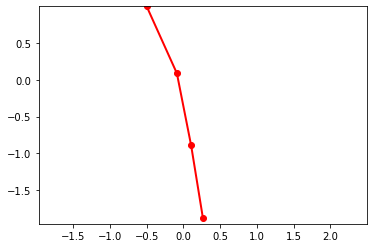

In [2]:
points_output.animate(fps = fps,movie_name = 'triple_pendulum_maximal.mp4',lw=2,marker='o',color=(1,0,0,1),linestyle='-')

In [3]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(points_output.anim.to_html5_video())